# Week 3 Discussion


## Debugging

When you get an error message or an incorrect result:

1. If there's an error message, what does the error message mean?
2. Where (what line) did the error come from? You may have to work backward.
3. Use `print()` or the interactive debugger to inspect variables.

In [2]:
def add3(x):
    return x + 3

add3("hi")

TypeError: can only concatenate str (not "int") to str

The error is "must be str, not int" and points to line 2 of the `add3()` function.

We can trace `x` in line 2 back to the parameter `x`. So maybe something is wrong with our call `add3("hi")`.

We can check by adding a print statement:

In [3]:
def add3(x):
    print(x)
    return x + 3

add3("hi")

hi


TypeError: can only concatenate str (not "int") to str

We could also use the debugger to check:

In [4]:
# Load the debugger module. This comes with Jupyter.
from IPython.core.debugger import set_trace


In [5]:
def add3(x):
    set_trace()
    return x + 3

add3("hi")

> <ipython-input-5-9b049ce682a7>(3)add3()
      1 def add3(x):
      2     set_trace()
----> 3     return x + 3
      4 
      5 add3("hi")

ipdb> q


BdbQuit: 

In [7]:
import random
random_range = 2,3


def float_factorial(j):
        if j==0:
                return 1
        return j* float_factorial(j-1)


def random_float(min_val = 0,max_val = 10):
        return min_val + random.random() * (max_val-min_val) #random.random() return a random variable between 0 and 1


rf = random_float(random_range)
ff = float_factorial(rf)
print('float_factorial({}) = {}'.format(rf,ff))
                      

TypeError: unsupported operand type(s) for -: 'int' and 'tuple'

If you're using the terminal, you can instead use:

```python
from ipdb import set_trace

# To pause the interpreter.
set_trace()
```
For more debugger commands, check this [python debugger checksheet](https://appletree.or.kr/quick_reference_cards/Python/Python%20Debugger%20Cheatsheet.pdf)

## Problem Solving: An Example

In [1]:
# Automatically display matplotlib plots, so that we don't have to write `plt.show()`.
# Normally this should be in a cell at the top of the notebook.
%matplotlib inline

numpy.ndarray

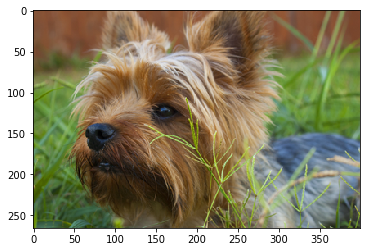

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as img

# # Dog image from https://unsplash.com/photos/jx_kpR7cvDc
dog = img.imread("dog.png")
plt.imshow(dog)

type(dog)

In [4]:
dog.shape

(266, 400, 3)

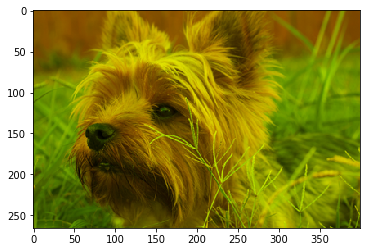

In [16]:
dog_rg = dog.copy()
dog_rg[:,:,2] = 0
plt.imshow(dog_rg)

Depending on which package you use to load an image, pixels may be encoded as integers or floating point (decimal) numbers. The scikit-image package has [some documentation](http://scikit-image.org/docs/dev/user_guide/data_types.html) about what these numbers typically mean.

In [17]:
dog.dtype

dtype('float32')

Let's try to find all the green pixels and make them red.

How can we do this?

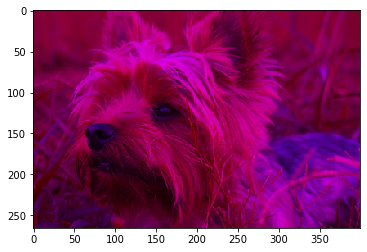

In [21]:
reddog_rgb = dog.copy()
#reddog_rgb[:, :, 0] = 1 # Set red channel to large value.
reddog_rgb[:, :, 1] = 0 # Set green channel to small value.
plt.imshow(reddog_rgb)

Break problems into small steps.

If you're trying to figure out how something works, test on small "toy" examples and draw pictures.

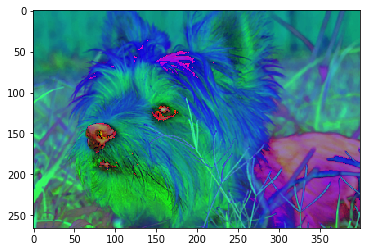

In [6]:
import numpy as np
import skimage as ski
import skimage.color

# Switch from (red, green, blue) to (hue, saturation, value).
# Hue is the color (from red to violet).
# Saturation is how colorful (from colorless to colorful).
# Value is how bright (from black to bright color).
dog_hsv = ski.color.rgb2hsv(dog)
plt.imshow(dog_hsv)

In [7]:
dog_hsv.shape

(266, 400, 3)

 Start by taking a small piece of the dog image, say the lower left corner.

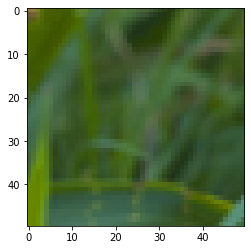

In [8]:
grass = dog_hsv[-50:, :50, :] #dog_hsv[266-50:266, 0:50, :]
plt.imshow(ski.color.hsv2rgb(grass))

How can we figure out what "green" looks like in HSV?

In [9]:
mu = grass.mean(axis = (0, 1))
mu

array([0.27836022, 0.5477844 , 0.36915514], dtype=float32)

We can preview this "green" by making a 2x2 swatch.

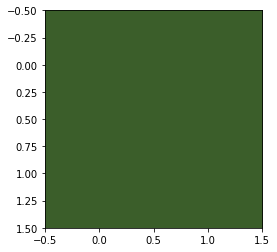

In [10]:
swatch = np.stack(4 * [mu]).reshape((2, 2, 3))
plt.imshow(ski.color.hsv2rgb(swatch))

Now we need to get all pixels with a hue "nearby" the grass mean.

How can we define "nearby"?

In [11]:
sd = grass.std(axis = (0, 1))
sd

array([0.05082941, 0.1843652 , 0.06428026], dtype=float32)

In [12]:
tol = (mu[0] - 3 * sd[0], mu[0] + 3 * sd[0])
tol

(0.12587197497487068, 0.43084846064448357)

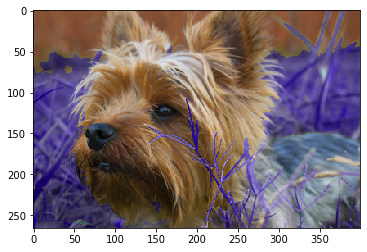

In [20]:
reddog = dog_hsv.copy()
is_green = (tol[0] <= reddog[:, :, 0]) & (reddog[:, :, 0] <= tol[1])
reddog[is_green, 0] = 0
plt.imshow(ski.color.hsv2rgb(reddog))

What would happen if we tried this with RGB instead of HSV?